## basin

### w 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 3D "basin" energy landscape demo (double-well / rugged)
# - Outputs a 3D surface with color-coded energy (basins)
# - Saves: basin_3d.png
# =========================================================

# Grid
n = 350
x = np.linspace(-2.2, 2.2, n)
y = np.linspace(-2.2, 2.2, n)
X, Y = np.meshgrid(x, y)

# --- A simple "W-ish" (multi-basin) potential in 2D ---
# Base double-well along x + confinement in y + small ruggedness
a = 1.0
b = 1.0
k_y = 0.8
rug_amp = 0.15
rug_k = 6.0

U = a * (X**2 - b)**2 + k_y * (Y**2)
U += rug_amp * (np.cos(rug_k * X) + np.cos(rug_k * Y))  # rugged micro-wells

# Normalize for nicer visuals (optional)
U0 = U.min()
U = U - U0

# Plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

# 3D surface with color-coded energy
surf = ax.plot_surface(X, Y, U, rstride=2, cstride=2, linewidth=0, antialiased=True)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U(x, y)")
ax.set_title("3D Energy Landscape (colored basins)")

# Colorbar (shows energy scale)
fig.colorbar(surf, ax=ax, shrink=0.7, pad=0.08, label="U (relative)")

plt.tight_layout()
plt.savefig("/mnt/hdd/jeff/dataset/output/collagen/ppt/basin_3d.png", dpi=200)
plt.show()

print("Saved: basin_3d.png")


### U

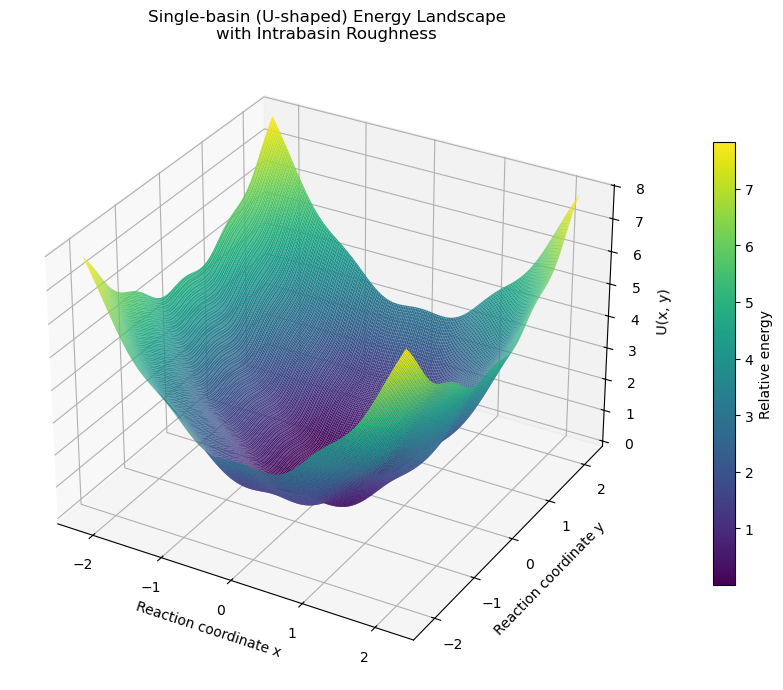

Saved: basin_single_u_3d.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================================
# 3D single-basin (U-shaped) energy landscape with roughness
# - All directions are U-shaped (one basin)
# - Small ruggedness inside the basin
# - Output: basin_single_u_3d.png
# =========================================================

# -----------------------------
# Grid
# -----------------------------
n = 350
x = np.linspace(-2.2, 2.2, n)
y = np.linspace(-2.2, 2.2, n)
X, Y = np.meshgrid(x, y)

# -----------------------------
# Potential parameters
# -----------------------------
k_x = 1.0      # curvature along x (U-shaped)
k_y = 0.6      # curvature along y (U-shaped)

rug_amp = 0.12 # ruggedness amplitude (small!)
rug_k   = 6.0  # ruggedness frequency

# -----------------------------
# Single-basin potential
# -----------------------------
# Macroscopic: single U-shaped basin
U = k_x * X**2 + k_y * Y**2

# Microscopic: intrabasin roughness
U += rug_amp * (np.cos(rug_k * X) + np.cos(rug_k * Y))

# Shift minimum to zero (purely cosmetic)
U -= U.min()

# -----------------------------
# Plot
# -----------------------------
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(
    X, Y, U,
    cmap="viridis",
    rstride=2,
    cstride=2,
    linewidth=0,
    antialiased=True
)

ax.set_xlabel("Reaction coordinate x")
ax.set_ylabel("Reaction coordinate y")
ax.set_zlabel("U(x, y)")
ax.set_title("Single-basin (U-shaped) Energy Landscape\nwith Intrabasin Roughness")

cbar = fig.colorbar(
    surf,
    ax=ax,
    shrink=0.7,
    pad=0.08
)
cbar.set_label("Relative energy")

plt.tight_layout()
plt.savefig(
    "/mnt/hdd/jeff/dataset/output/collagen/ppt/basinu_3d.png",
    dpi=200
)
plt.show()

print("Saved: basin_single_u_3d.png")
